In [2]:
# I will use this notebook to code up examples by myself

In [ ]:
#Initial exploration:

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
#import data, get its shape: (#rows, #cols)
data = pd.read_csv('../../datasets/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [6]:
#use head to see what data the columns hold
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [8]:
#how many unqiue countries are there?
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [9]:
# sanity check => How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [10]:
# How many unique indicators are there ?
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [11]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

In [13]:
#What's the range of years?
print(min(years), " to ", max(years))

1960  to  2015


In [ ]:
#Matplotlib: Basic Plotting, Part 1

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the Netherlands

In [12]:
# select CO2 emissions for the NL
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'NLD'

#filter data with the help of masks
mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the NL for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [14]:
#get first 5 rows
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16045,Netherlands,NLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.399180
41590,Netherlands,NLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,6.520358
69459,Netherlands,NLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,7.060854
98013,Netherlands,NLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,7.623925
126936,Netherlands,NLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,7.987673


### Let's see how emissions have changed over time using MatplotLib

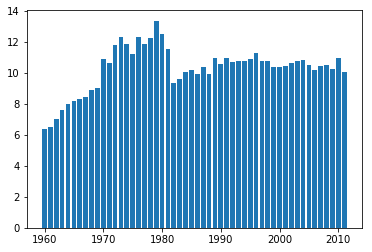

In [16]:
#get the years
years = stage['Year'].values

#get CO2 values
co2 = stage['Value'].values

#create a bar chart
plt.bar(years, co2)
plt.show()

let's make it the plot more appealing before further exploration

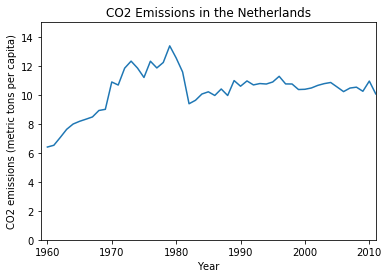

In [20]:
# switch to a line plot, plt.plot asks for line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in the Netherlands')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011, 0, 15])

plt.show()

## Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

In [22]:
#look at all the data
hist_data = stage['Value'].values


In [23]:
print(len(hist_data))

52


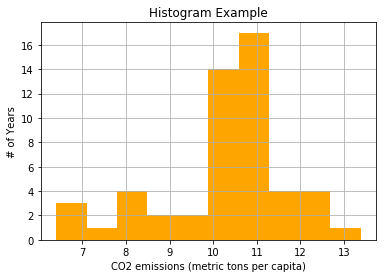

In [24]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='orange')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()


So the NL has many years where it produced between 10-11 metric tons per capita with outliers on either side.

### But how do the NL's numbers relate to those of other countries?

In [30]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

#get value for NL to be able position subplot with arrow accordingly later on the histogram
#hist_NL = 'NLD'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])
#mask3  =data['CountryCode'].str.contains(hist_NL)

# apply our mask
#co2_2011 = data[mask1 & mask2 & mask3]
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [26]:
print(len(co2_2011))

232


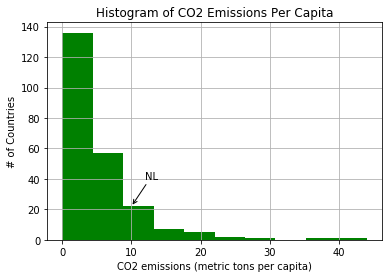

In [43]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("NL",
            xy=(10, 22), xycoords='data',
            xytext=(12, 40), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()